In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "/content/drive/MyDrive/Datasets/spider/"

df = pd.read_json(path + "train_spider.json")

df[1:10]

,db_id,query,query_toks,query_toks_no_value,question,question_toks,sql
1,department_management,"SELECT name , born_state , age FROM head ORD...","[SELECT, name, ,, born_state, ,, age, FROM, he...","[select, name, ,, born_state, ,, age, from, he...","List the name, born state and age of the heads...","[List, the, name, ,, born, state, and, age, of...","{'from': {'table_units': [['table_unit', 1]], ..."
2,department_management,"SELECT creation , name , budget_in_billions ...","[SELECT, creation, ,, name, ,, budget_in_billi...","[select, creation, ,, name, ,, budget_in_billi...","List the creation year, name and budget of eac...","[List, the, creation, year, ,, name, and, budg...","{'from': {'table_units': [['table_unit', 0]], ..."
3,department_management,"SELECT max(budget_in_billions) , min(budget_i...","[SELECT, max, (, budget_in_billions, ), ,, min...","[select, max, (, budget_in_billions, ), ,, min...",What are the maximum and minimum budget of the...,"[What, are, the, maximum, and, minimum, budget...","{'from': {'table_units': [['table_unit', 0]], ..."
4,department_management,SELECT avg(num_employees) FROM department WHER...,"[SELECT, avg, (, num_employees, ), FROM, depar...","[select, avg, (, num_employees, ), from, depar...",What is the average number of employees of the...,"[What, is, the, average, number, of, employees...","{'from': {'table_units': [['table_unit', 0]], ..."
5,department_management,SELECT name FROM head WHERE born_state != 'Cal...,"[SELECT, name, FROM, head, WHERE, born_state, ...","[select, name, from, head, where, born_state, ...",What are the names of the heads who are born o...,"[What, are, the, names, of, the, heads, who, a...","{'from': {'table_units': [['table_unit', 1]], ..."
6,department_management,SELECT DISTINCT T1.creation FROM department AS...,"[SELECT, DISTINCT, T1.creation, FROM, departme...","[select, distinct, t1, ., creation, from, depa...",What are the distinct creation years of the de...,"[What, are, the, distinct, creation, years, of...","{'from': {'table_units': [['table_unit', 0], [..."
7,department_management,SELECT born_state FROM head GROUP BY born_stat...,"[SELECT, born_state, FROM, head, GROUP, BY, bo...","[select, born_state, from, head, group, by, bo...",What are the names of the states where at leas...,"[What, are, the, names, of, the, states, where...","{'from': {'table_units': [['table_unit', 1]], ..."
8,department_management,SELECT creation FROM department GROUP BY creat...,"[SELECT, creation, FROM, department, GROUP, BY...","[select, creation, from, department, group, by...",In which year were most departments established?,"[In, which, year, were, most, departments, est...","{'from': {'table_units': [['table_unit', 0]], ..."
9,department_management,"SELECT T1.name , T1.num_employees FROM depart...","[SELECT, T1.name, ,, T1.num_employees, FROM, d...","[select, t1, ., name, ,, t1, ., num_employees,...",Show the name and number of employees for the ...,"[Show, the, name, and, number, of, employees, ...","{'from': {'table_units': [['table_unit', 0], [..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   db_id                7000 non-null   object
 1   query                7000 non-null   object
 2   query_toks           7000 non-null   object
 3   query_toks_no_value  7000 non-null   object
 4   question             7000 non-null   object
 5   question_toks        7000 non-null   object
 6   sql                  7000 non-null   object
dtypes: object(7)
memory usage: 382.9+ KB


In [ ]:
df.describe()

,db_id,query,query_toks,query_toks_no_value,question,question_toks,sql
count,7000,7000,7000,7000,7000,7000,7000
unique,140,3964,3962,3886,6962,6962,3580
top,college_2,SELECT count(*) FROM Accounts,"[SELECT, count, (, *, ), FROM, Accounts]","[select, count, (, *, ), from, customers]",How many students are there?,"[How, many, students, are, there, ?]","{'from': {'table_units': [['table_unit', 0]], ..."
freq,170,6,6,13,4,4,89


We don't need db_id, query_totks_no_value, and question columns.

In [6]:
df = df.drop(columns = ['db_id','query_toks_no_value','question'])
df.head()

,query,query_toks,question_toks,sql
0,SELECT count(*) FROM head WHERE age > 56,"[SELECT, count, (, *, ), FROM, head, WHERE, ag...","[How, many, heads, of, the, departments, are, ...","{'from': {'table_units': [['table_unit', 1]], ..."
1,"SELECT name , born_state , age FROM head ORD...","[SELECT, name, ,, born_state, ,, age, FROM, he...","[List, the, name, ,, born, state, and, age, of...","{'from': {'table_units': [['table_unit', 1]], ..."
2,"SELECT creation , name , budget_in_billions ...","[SELECT, creation, ,, name, ,, budget_in_billi...","[List, the, creation, year, ,, name, and, budg...","{'from': {'table_units': [['table_unit', 0]], ..."
3,"SELECT max(budget_in_billions) , min(budget_i...","[SELECT, max, (, budget_in_billions, ), ,, min...","[What, are, the, maximum, and, minimum, budget...","{'from': {'table_units': [['table_unit', 0]], ..."
4,SELECT avg(num_employees) FROM department WHER...,"[SELECT, avg, (, num_employees, ), FROM, depar...","[What, is, the, average, number, of, employees...","{'from': {'table_units': [['table_unit', 0]], ..."


Query Tokens Length - Max:90, Min:4, Avg:18.493285714285715


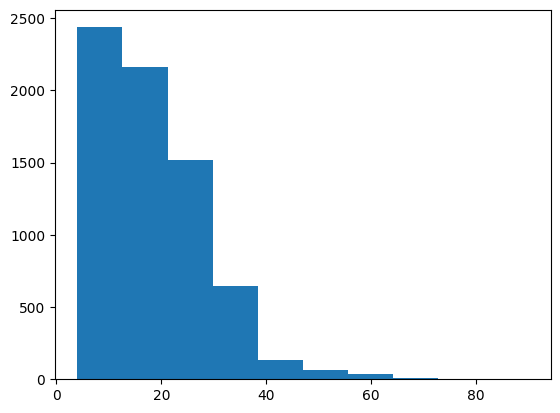

In [11]:
query_len = df['query_toks'].str.len()
print("Query Tokens Length - Max:{}, Min:{}, Avg:{}".format(max(query_len), min(query_len), query_len.mean()))

qrylen = np.array(query_len)
plt.hist(qrylen)
plt.show()

Question Tokens Length - Max:44, Min:4, Avg:14.182285714285713


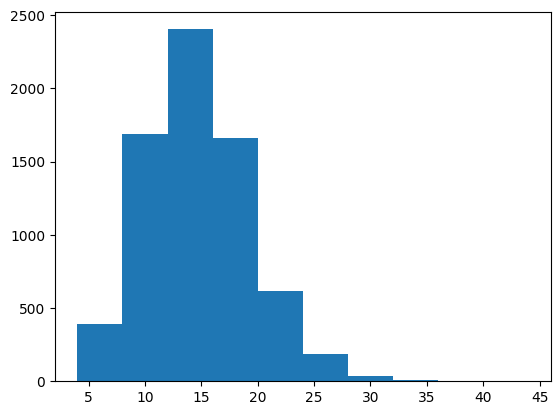

In [12]:
qsn_len = np.array(df['question_toks'].str.len())
print("Question Tokens Length - Max:{}, Min:{}, Avg:{}".format(max(qsn_len), min(qsn_len), qsn_len.mean()))
plt.hist(qsn_len)
plt.show()